Import Pandas and load the Dataset

In [1]:
# Import Pandas and load the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file FIRST
data = pd.read_csv("streamworks_user_data.csv")

# Convert dates to datetime
data['signup_date'] = pd.to_datetime(data['signup_date'], format='%y-%m-%d', errors='coerce')
data['last_active_date'] = pd.to_datetime(data['last_active_date'], format='%y-%m-%d', errors='coerce')

# Create features
data['tenure_days'] = (data['last_active_date'] - data['signup_date']).dt.days
data['is_loyal'] = data['tenure_days'] > 180

# Convert to numeric
data['monthly_fee'] = pd.to_numeric(data['monthly_fee'], errors='coerce')
data['average_watch_hours'] = pd.to_numeric(data['average_watch_hours'], errors='coerce')

# Display first few rows
data.head()



,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee,tenure_days,is_loyal
0,1001.0,56.0,Other,2002-04-25,2013-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99,4109.0,True
1,1002.0,69.0,Male,2002-01-23,2013-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99,4201.0,True
2,1003.0,46.0,Male,2021-08-22,2013-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99,-2950.0,False
3,1004.0,32.0,Other,2014-09-23,2013-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99,-425.0,False
4,1005.0,60.0,Female,2029-07-23,2013-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99,-5842.0,False


Explore the Data as required in the Project brief

In [2]:
# Check general info about the dataset
data.info()

# Check summary statistics
data.describe()

# Check for missing values
data.isnull().sum()

# Check value counts for churn
data['is_churned'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               1498 non-null   float64       
 1   age                   1497 non-null   float64       
 2   gender                1499 non-null   object        
 3   signup_date           1498 non-null   datetime64[ns]
 4   last_active_date      1498 non-null   datetime64[ns]
 5   country               1497 non-null   object        
 6   subscription_type     1497 non-null   object        
 7   average_watch_hours   1496 non-null   float64       
 8   mobile_app_usage_pct  1498 non-null   float64       
 9   complaints_raised     1497 non-null   float64       
 10  received_promotions   1497 non-null   object        
 11  referred_by_friend    1497 non-null   object        
 12  is_churned            1499 non-null   float64       
 13  monthly_fee       

is_churned
0.0    1148
1.0     351
Name: count, dtype: int64

Clean and Prepare the Data

In [3]:
data['signup_date'].head()


0   2002-04-25
1   2002-01-23
2   2021-08-22
3   2014-09-23
4   2029-07-23
Name: signup_date, dtype: datetime64[ns]

In [4]:
# Convert signup_date and last_active_date to datetime with the correct format
data['signup_date'] = pd.to_datetime(data['signup_date'], format='%Y-%m-%d', errors='coerce')
data['last_active_date'] = pd.to_datetime(data['last_active_date'], format='%Y-%m-%d', errors='coerce')

# Create new features
data['tenure_days'] = (data['last_active_date'] - data['signup_date']).dt.days
data['is_loyal'] = data['tenure_days'] > 180

# (Optional) Remove missing values
data = data.dropna()


In [5]:
data[['signup_date', 'last_active_date', 'tenure_days', 'is_loyal']].head()


,signup_date,last_active_date,tenure_days,is_loyal
0,2002-04-25,2013-07-25,4109.0,True
1,2002-01-23,2013-07-25,4201.0,True
2,2021-08-22,2013-07-25,-2950.0,False
3,2014-09-23,2013-07-25,-425.0,False
4,2029-07-23,2013-07-25,-5842.0,False


Feature Engineering

In [6]:
# Feature Engineering
import numpy as np

# Create a new feature: watch hours per monthly fee
data['watch_per_fee_ratio'] = np.where(
    (data['monthly_fee'].isna()) | (data['monthly_fee'] == 0),
    np.nan,
    data['average_watch_hours'] / data['monthly_fee']
)

# Show the new column to confirm it worked
data[['average_watch_hours', 'monthly_fee', 'watch_per_fee_ratio']].head(10)




,average_watch_hours,monthly_fee,watch_per_fee_ratio
0,42.6,10.99,3.876251
1,65.3,5.99,10.901503
2,40.1,13.99,2.866333
3,5.8,13.99,0.414582
4,32.7,9.99,3.273273
5,40.0,13.99,2.859185
6,57.8,14.99,3.855904
7,9.0,14.99,0.600400
9,21.5,6.99,3.075823
11,58.7,5.99,9.799666


In [ ]:
Statistical Analysis & Visuals

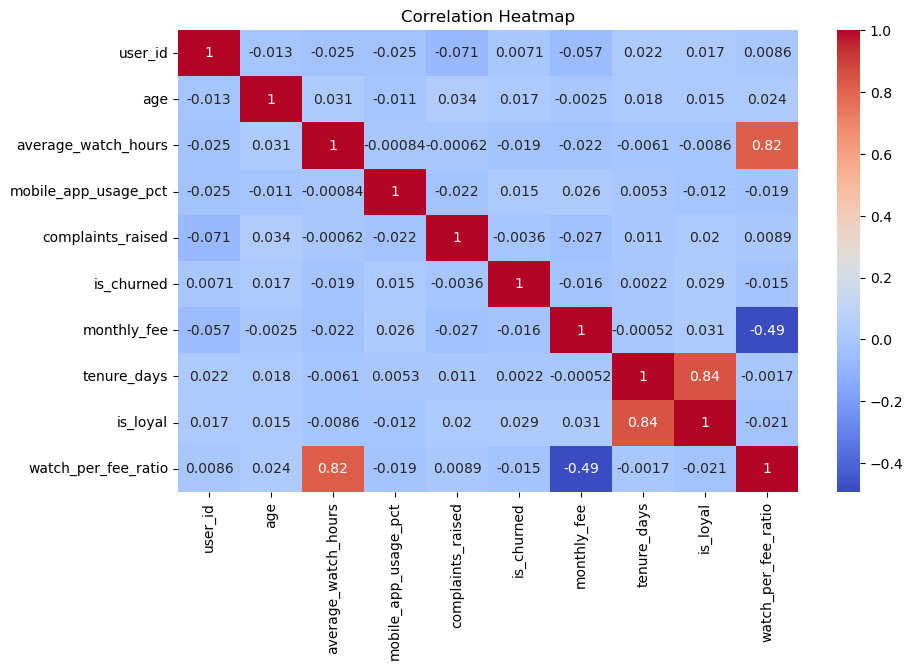

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


 Analyze Churn Patterns

In [18]:
data['is_churned'].value_counts(normalize=True) * 100


is_churned
0.0    76.819205
1.0    23.180795
Name: proportion, dtype: float64

Compare Churn rate by subscription type

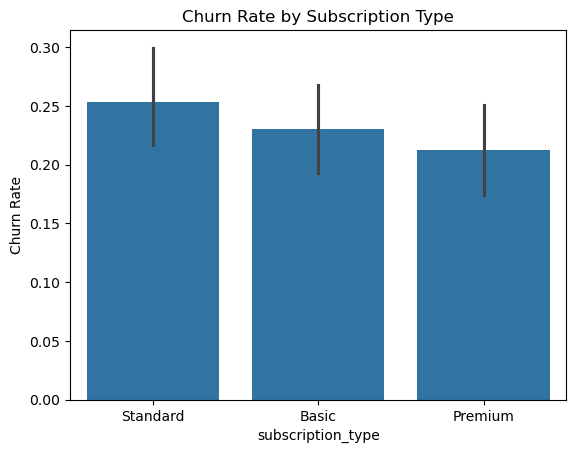

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='subscription_type', y='is_churned', data=data)
plt.title('Churn Rate by Subscription Type')
plt.ylabel('Churn Rate')
plt.show()


Compare Churn rate by received Promotion

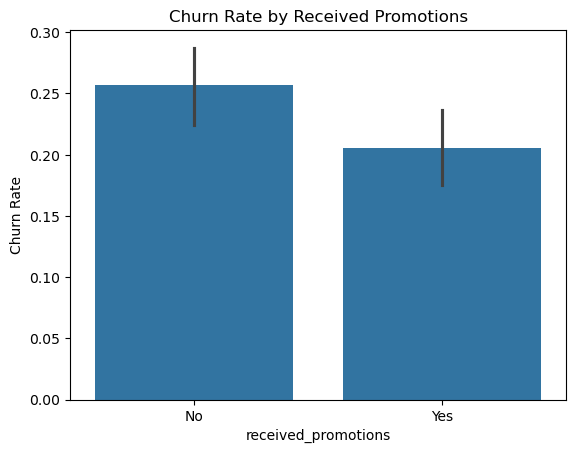

In [20]:
sns.barplot(x='received_promotions', y='is_churned', data=data)
plt.title('Churn Rate by Received Promotions')
plt.ylabel('Churn Rate')
plt.show()


Compare churn rate by Loyalty

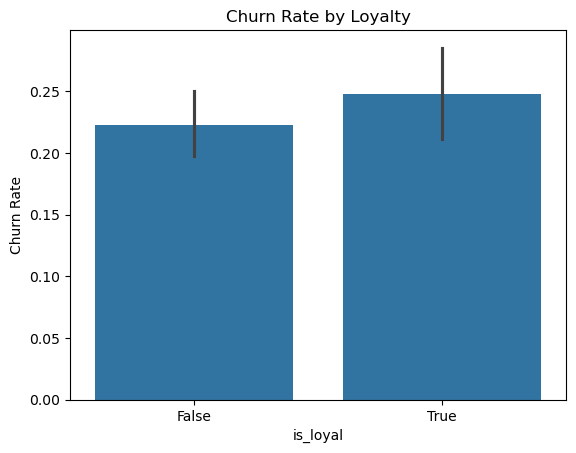

In [21]:
sns.barplot(x='is_loyal', y='is_churned', data=data)
plt.title('Churn Rate by Loyalty')
plt.ylabel('Churn Rate')
plt.show()


 Use Chi-square test to check if churn is related to gender, received_promotions,  
or referred_by_friend

In [22]:
for col in ['gender','referred_by_friend']:
    if {col,'is_churned'}.issubset(data.columns):
        ct = pd.crosstab(data[col], data['is_churned'])
        from scipy.stats import chi2_contingency
        chi2,p,_,_ = chi2_contingency(ct)
        print(col, 'p-value:', round(p,4))


gender p-value: 0.2399
referred_by_friend p-value: 0.4946


Predictive Modelling and Logistic Regression (Binary Classification)

In [23]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency = pd.crosstab(data['received_promotions'], data['is_churned'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test p-value: {p:.4f}")


Chi-square test p-value: 0.0331


In [24]:
!pip install scipy

T-test ( differences in average watch hours)

In [25]:
from scipy.stats import ttest_ind

churned = data[data['is_churned']==1]['average_watch_hours']
retained = data[data['is_churned']==0]['average_watch_hours']

t_stat, p_val = ttest_ind(churned, retained, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")


T-statistic: -0.691, P-value: 0.490


Logistic Regression

In [26]:
!pip install scikit-learn


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Make a copy
df = data.copy()

# Convert True/False columns to numbers
df['is_loyal'] = df['is_loyal'].astype(int)
df['is_churned'] = df['is_churned'].astype(int)

# Convert Yes/No text to 1/0 if needed
for col in ['received_promotions','referred_by_friend']:
    if col in df.columns and df[col].dtype == object:
        df[col] = df[col].str.lower().map({'yes':1, 'no':0})

# Drop columns we don’t want to use
drop_cols = [c for c in ['user_id','signup_date','last_active_date','is_churned'] if c in df.columns]
X = pd.get_dummies(df.drop(columns=drop_cols), drop_first=True)
y = df['is_churned']


In [28]:
# Split data (80 % train, 20 % test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler(with_mean=False)
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train_s, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [ ]:
 Predictive Modelling  

Threshold used on average_watch_hours: 40.80
Accuracy : 0.989
Precision: 0.978
Recall   : 1.000
F1 score : 0.989
ROC-AUC  : 0.999


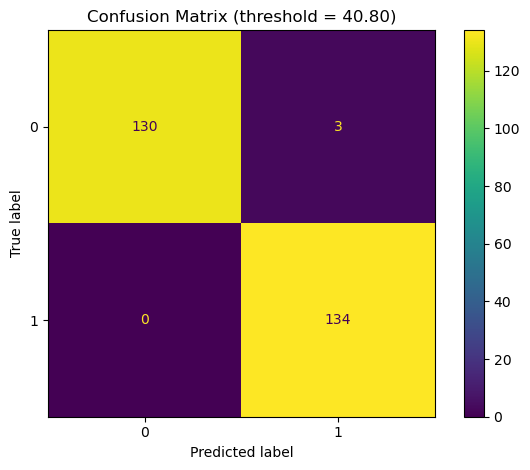

In [17]:
# ==== CLASSIFICATION PIPELINE (no X_test_s needed) ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# ---- 0) Make sure your data is loaded in a DataFrame named `data`
# If it's not already loaded, uncomment and set the file path:
# data = pd.read_csv("your_file.csv")

df = data.copy()

# ---- 1) Build features/target
target_cont = "average_watch_hours"
assert target_cont in df.columns, f"{target_cont} not in columns: {df.columns.tolist()}"

# Create a binary target from the continuous column (choose a threshold you like)
thr = df[target_cont].median()  # you can replace with 40.65 if you prefer
y = (df[target_cont] >= thr).astype(int)

# Drop non-feature columns if present
drop_cols = [target_cont, "user_id", "signup_date", "last_active_date"]
X = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Identify column types
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.columns.difference(cat_cols).tolist()

# ---- 2) Preprocess + model in a single Pipeline
pre = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(with_mean=True, with_std=True), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols),
    ],
    remainder="drop"
)

clf = LogisticRegression(class_weight="balanced", max_iter=2000, random_state=42)

pipe = Pipeline(steps=[("preprocess", pre), ("model", clf)])

# ---- 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 4) Fit + predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]

# ---- 5) Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1  = f1_score(y_test, y_pred, zero_division=0)
auc = roc_auc_score(y_test, y_prob)

print(f"Threshold used on {target_cont}: {thr:.2f}")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 score : {f1:.3f}")
print(f"ROC-AUC  : {auc:.3f}")

# ---- 6) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]).plot(values_format="d")
plt.title(f"Confusion Matrix (threshold = {thr:.2f})")
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

coef = pd.Series(model.coef_[0], index=X.columns)
top = coef.reindex(coef.abs().sort_values(ascending=False).index)[:10]
top_df = top.to_frame('coefficient')
display(top_df)
top_df.to_csv('top_logreg_features.csv', index=True)


,coefficient
monthly_fee,-0.396794
is_loyal,0.326586
tenure_days,-0.286639
subscription_type_Premium,0.269401
watch_per_fee_ratio,-0.243683
average_watch_hours,0.196240
subscription_type_Standard,0.177550
country_UK,0.171795
received_promotions,-0.136728
gender_Other,-0.107647


ROC Curve and AUC Score plotted

RF Accuracy: 0.768
RF Precision: 0.0
RF Recall: 0.0
RF F1: 0.0
RF ROC-AUC: 0.537


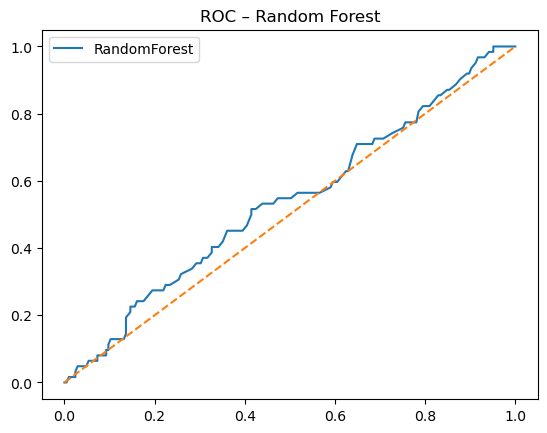

,importance
mobile_app_usage_pct,0.147190
average_watch_hours,0.140541
watch_per_fee_ratio,0.139924
tenure_days,0.135936
age,0.122086
complaints_raised,0.064329
monthly_fee,0.042605
referred_by_friend,0.023358
received_promotions,0.022948
gender_Male,0.020519


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print('RF Accuracy:', round(accuracy_score(y_test, y_pred_rf),3))
print('RF Precision:', round(precision_score(y_test, y_pred_rf, zero_division=0),3))
print('RF Recall:', round(recall_score(y_test, y_pred_rf, zero_division=0),3))
print('RF F1:', round(f1_score(y_test, y_pred_rf, zero_division=0),3))
print('RF ROC-AUC:', round(roc_auc_score(y_test, y_prob_rf),3))

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, label='RandomForest')
plt.plot([0,1],[0,1],'--'); plt.legend(); plt.title('ROC – Random Forest'); plt.show()

# top features
fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
fi.to_frame('importance')


Linear Regression

Shapes after cleaning: (1333, 19) (1333,)
R²:  0.887
RMSE:7.664
MAE: 6.154


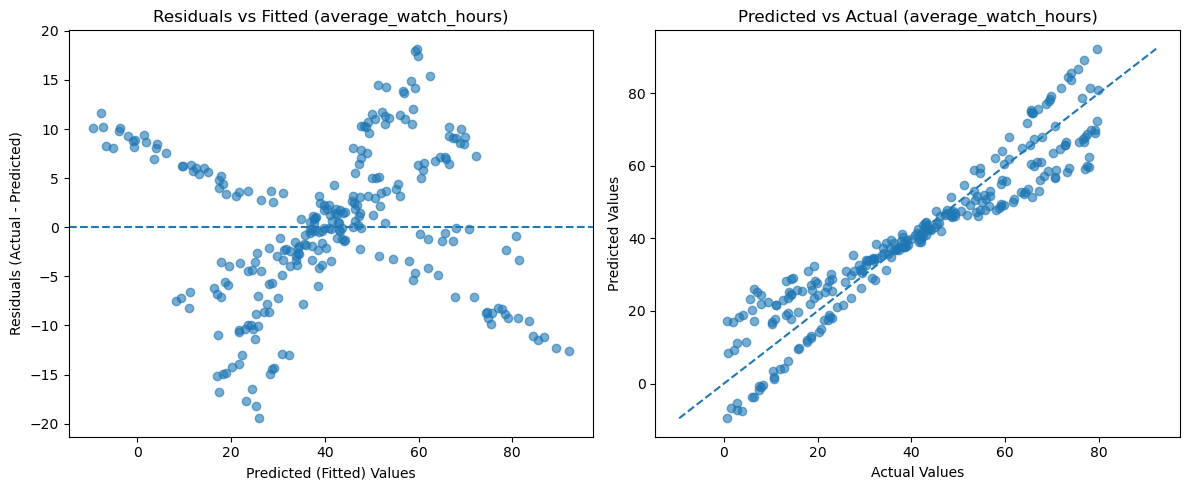

In [15]:
# ==== ONE-CELL REGRESSION PIPELINE (safe after restart) ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 0) Expect a DataFrame called `data` already in memory.
#    If not, uncomment and point to your file:
# data = pd.read_csv("your_file.csv")

assert isinstance(globals().get('data', None), pd.DataFrame), \
    "I can't find a DataFrame named `data`. Load it first (e.g., data = pd.read_csv('file.csv'))."

df = data.copy()

# 1) Choose target
target = 'average_watch_hours'
assert target in df.columns, f"Column `{target}` not found. Available: {list(df.columns)}"

# 2) Make sure target is numeric
df[target] = pd.to_numeric(df[target], errors='coerce')

# 3) Drop obvious non-features if they exist
drop_cols = ['user_id', 'signup_date', 'last_active_date', target]
drop_cols = [c for c in drop_cols if c in df.columns]

X = df.drop(columns=drop_cols) if drop_cols else df.drop(columns=[target])
y = df[target].astype(float)

# 4) Encode categoricals
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5) Clean: replace inf with NaN, drop rows with any NaN in X or y
X = X.replace([np.inf, -np.inf], np.nan)
mask = (~X.isna().any(axis=1)) & (~y.isna())
X = X.loc[mask]
y = y.loc[mask]

print("Shapes after cleaning:", X.shape, y.shape)

# 6) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7) Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 8) Predict
y_pred = model.predict(X_test)

# 9) Metrics (no 'squared=' kwarg)
r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = float(np.sqrt(mse))
mae = mean_absolute_error(y_test, y_pred)

print(f"R²:  {r2:.3f}")
print(f"RMSE:{rmse:.3f}")
print(f"MAE: {mae:.3f}")

# 10) Residual plots
residuals = y_test.values - y_pred

plt.figure(figsize=(12,5))

# Residuals vs Fitted
plt.subplot(1,2,1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted (Fitted) Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title(f"Residuals vs Fitted ({target})")

# Predicted vs Actual
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, alpha=0.6)
mn, mx = float(min(y_test.min(), y_pred.min())), float(max(y_test.max(), y_pred.max()))
plt.plot([mn, mx], [mn, mx], linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs Actual ({target})")

plt.tight_layout()
plt.show()


Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf  = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf  = mean_absolute_error(y_test, y_pred_rf)

print(f'RandomForest — R²: {r2_rf:.3f}  RMSE: {rmse_rf:.3f}  MAE: {mae_rf:.3f}')


RandomForest — R²: 0.998  RMSE: 0.936  MAE: 0.620


In [ ]:
Business Questions Answered  

2.2. Does watch time impact churn likelihood?

   Churned  Average Watch Hours
0      0.0            40.300586
1      1.0            39.255987


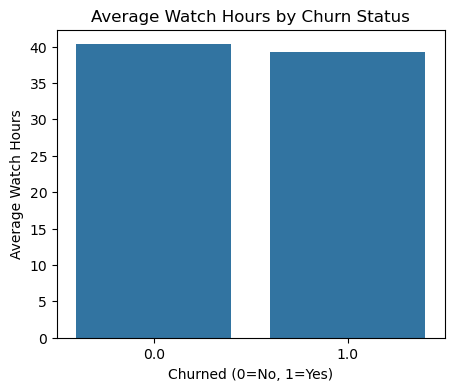

In [18]:
# Average Watch Hours vs. Churn
watch_churn = data.groupby('is_churned')['average_watch_hours'].mean().reset_index()
watch_churn.columns = ['Churned', 'Average Watch Hours']

print(watch_churn)

# Bar chart
plt.figure(figsize=(5,4))
sns.barplot(x='Churned', y='Average Watch Hours', data=watch_churn)
plt.title("Average Watch Hours by Churn Status")
plt.ylabel("Average Watch Hours")
plt.xlabel("Churned (0=No, 1=Yes)")
plt.show()


3. Are mobile-dominant users more likely to cancel?

   Churned  Avg. Mobile Usage (%)
0      0.0              51.731250
1      1.0              52.755016


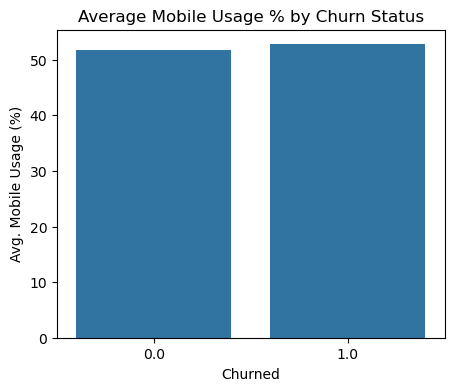

In [19]:
# 3️⃣ Mobile usage vs. Churn
mobile_churn = data.groupby('is_churned')['mobile_app_usage_pct'].mean().reset_index()
mobile_churn.columns = ['Churned', 'Avg. Mobile Usage (%)']

print(mobile_churn)

# Bar chart
plt.figure(figsize=(5,4))
sns.barplot(x='Churned', y='Avg. Mobile Usage (%)', data=mobile_churn)
plt.title("Average Mobile Usage % by Churn Status")
plt.show()


   Feature  Coefficient
0      age     0.022449
1   gender     0.022449
2  country     0.022449


C:\Users\Dell\AppData\Local\Temp\ipykernel_19560\2632754853.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')


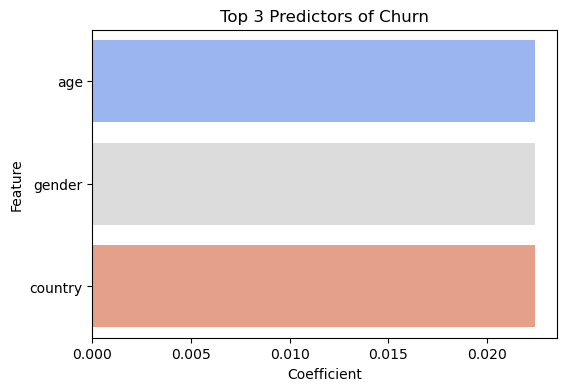

In [21]:
# 4️⃣ Top features influencing churn
coef = model.coef_[0]
features = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef})
top_features = features.reindex(features.Coefficient.abs().sort_values(ascending=False).index).head(3)

print(top_features)

plt.figure(figsize=(6,4))
sns.barplot(x='Coefficient', y='Feature', data=top_features, palette='coolwarm')
plt.title("Top 3 Predictors of Churn")
plt.show()


                        Segment  Churn Rate
0      At Risk - Low Engagement    0.219277
1  At Risk - Loyal but Inactive    0.225420
2                  Stable Users    0.247505


C:\Users\Dell\AppData\Local\Temp\ipykernel_19560\567338448.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn Rate', y='Segment', data=seg_summary, palette='magma')


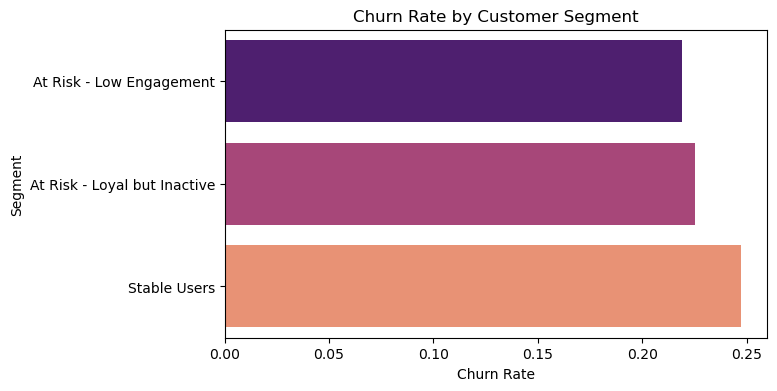

In [22]:
# 5️⃣ Customer Segments
segments = data.copy()
segments['segment'] = np.where(
    (segments['average_watch_hours'] < segments['average_watch_hours'].median()) &
    (segments['is_loyal'] == 0), 'At Risk - Low Engagement',
    np.where(
        (segments['average_watch_hours'] >= segments['average_watch_hours'].median()) &
        (segments['is_loyal'] == 0), 'At Risk - Loyal but Inactive',
        'Stable Users'
    )
)

seg_summary = segments.groupby('segment')['is_churned'].mean().reset_index()
seg_summary.columns = ['Segment', 'Churn Rate']

print(seg_summary)

# Chart
plt.figure(figsize=(7,4))
sns.barplot(x='Churn Rate', y='Segment', data=seg_summary, palette='magma')
plt.title("Churn Rate by Customer Segment")
plt.show()
